In [66]:
using DifferentialEquations
using Gadfly
using DataFrames
set_default_plot_size(30cm, 10cm)

In [75]:
timespan = (0.0,20.0);

In [76]:
# http://docs.juliadiffeq.org/latest/analysis/parameterized_functions.html
using ParameterizedFunctions
fun = @ode_def LV begin
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    end a b c d

(::LV) (generic function with 9 methods)

In [111]:
function calcWithParams(A,B,C,D,x0,y0;title="plot")
    odeproblem = ODEProblem(fun,[x0,y0],timespan,[A,B,C,D])
    solution = solve(odeproblem,RK4(),dt=0.01)
    title = string(title,": ",string(A),",",string(B),",",string(C),",",string(D))
    valuesPerTime=DataFrame(t=solution.t, x=map((x)->x[1],solution.u),y=map((x)->x[2],solution.u), Experiment = title)
    valuesPerTime[:Delta] = map((x,y) -> y - x, valuesPerTime[:x], valuesPerTime[:y])
    rename!(valuesPerTime,:t, :Time)
    rename!(valuesPerTime,:x, :Prey)
    rename!(valuesPerTime,:y, :Predator)
    writetable(string(title,".csv"), valuesPerTime)
    predator = valuesPerTime[:Predator]
    prey = valuesPerTime[:Prey]
    vals=DataFrame(Species=["Prey","Predator"],Maximum=[maximum(prey),maximum(predator)],Minimum=[minimum(prey),minimum(predator)],Mean=[mean(prey),mean(predator)])
    print(title,"\n",vals,"\n\n")
    return valuesPerTime
end

experiments = []
push!(experiments,calcWithParams(1 , 1 , 1 , 1 , 6.0 , 4.0,title="plot1"))
push!(experiments,calcWithParams(2,1,3,1, 8.0,3.0,title="plot2"))
push!(experiments,calcWithParams(5,2,1,1.5, 6.0 , 4.0,title="plot3"))
push!(experiments,calcWithParams(10,2,5,2,6.0,4.0,title="plot4"))
push!(experiments,calcWithParams(10,4,8,2,6.0,6.0,title="plot5"))
data=vcat(experiments...)

plot1: 1,1,1,1
2×4 DataFrames.DataFrame
│ Row │ Species    │ Maximum │ Minimum    │ Mean    │
├─────┼────────────┼─────────┼────────────┼─────────┤
│ 1   │ "Prey"     │ 7.87317 │ 0.0029728  │ 1.34661 │
│ 2   │ "Predator" │ 7.87792 │ 0.00298339 │ 2.70947 │

plot2: 2,1,3,1
2×4 DataFrames.DataFrame
│ Row │ Species    │ Maximum │ Minimum  │ Mean    │
├─────┼────────────┼─────────┼──────────┼─────────┤
│ 1   │ "Prey"     │ 8.2993  │ 0.647684 │ 3.22724 │
│ 2   │ "Predator" │ 6.64937 │ 0.274512 │ 2.65642 │

plot3: 5,2,1,1.5
2×4 DataFrames.DataFrame
│ Row │ Species    │ Maximum │ Minimum    │ Mean     │
├─────┼────────────┼─────────┼────────────┼──────────┤
│ 1   │ "Prey"     │ 6.47596 │ 0.00038608 │ 0.958575 │
│ 2   │ "Predator" │ 8.89896 │ 0.283736   │ 4.08108  │

plot4: 10,2,5,2
2×4 DataFrames.DataFrame
│ Row │ Species    │ Maximum │ Minimum  │ Mean    │
├─────┼────────────┼─────────┼──────────┼─────────┤
│ 1   │ "Prey"     │ 6.19484 │ 0.683313 │ 2.61296 │
│ 2   │ "Predator" │ 9.7813  │ 2.1

,Time,Prey,Predator,Experiment,Delta
1,0.0,6.0,4.0,"plot1: 1,1,1,1",-2.0
2,0.01,5.8168283723027345,4.201256635547308,"plot1: 1,1,1,1",-1.6155717367554265
3,0.025451331465256327,5.522695984528432,4.5156698559415736,"plot1: 1,1,1,1",-1.0070261285868582
4,0.04564618023199593,5.122812105048981,4.927712425824767,"plot1: 1,1,1,1",-0.19509967922421367
5,0.07412130422902166,4.543563278182214,5.496140575431779,"plot1: 1,1,1,1",0.9525772972495652
6,0.10894015308337951,3.8409295376610437,6.1418590104307995,"plot1: 1,1,1,1",2.300929472769756
7,0.1423586900480351,3.204694441531477,6.681161102387327,"plot1: 1,1,1,1",3.4764666608558503
8,0.17938918689638386,2.5726099211985556,7.16321611781612,"plot1: 1,1,1,1",4.590606196617564
9,0.21761784531677547,2.0177287136658553,7.524326907999388,"plot1: 1,1,1,1",5.506598194333533
10,0.2588066814022343,1.5338638382950465,7.765554105408928,"plot1: 1,1,1,1",6.231690267113882


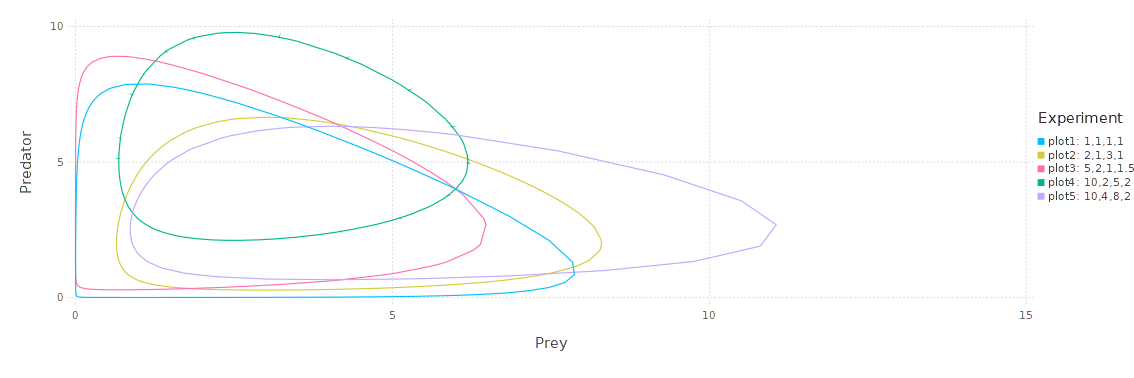

In [147]:
plot(data, x="Prey", y="Predator", color = "Experiment",Geom.polygon)

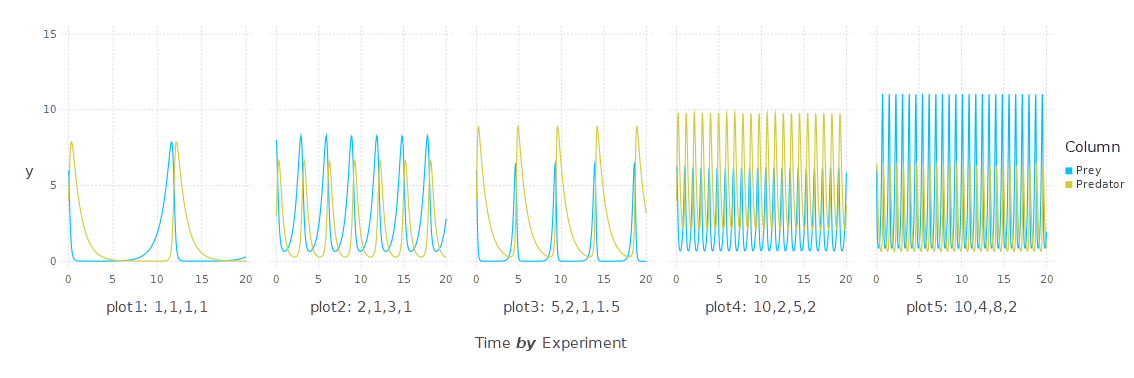

In [141]:
plot(data,  x="Time", y=Col.value(:Prey,:Predator),color=Col.index(:Prey,:Predator),xgroup="Experiment",Geom.subplot_grid(Geom.path))